<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Rizdha**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Table of Contents
- Deskripsi Proyek
- EDA
- Data Separation
- Model Training & Validation
- Testing
- General Conclusion

# Deskripsi Proyek

Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Dimana kita memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank. berdasarkan data ini kita akan membuat model F1 dengan skor setinggi mungkin, dengan minimal nilai F1 0.59 pada test dataset, selain itu kita akan mengukur metrik AUC-ROC dan membandingkan metrik tersebut dengan skor F1 yang kita miliki

**Fitur - Fitur
- RowNumber — indeks string data
- CustomerId — ID pelanggan
- Surname — nama belakang
- CreditScore — skor kredit
- Geography — negara domisili
- Gender — gender
- Age — umur
- Tenure — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
- Balance — saldo rekening
- NumOfProducts — jumlah produk bank yang digunakan oleh nasabah
- HasCrCard — apakah nasabah memiliki kartu kredit (1 - jika ya; 0 - jika tidak)
- IsActiveMember — tingkat keaktifan nasabah (1 - jika ya; 0 - jika tidak)
- EstimatedSalary — estimasi gaji

**Target
- Exited — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## EDA
### Library

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sidetable
import sidetable as stb
import warnings

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Loading Dataset

In [2]:
try:
    df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv')
except:
    df = pd.read_csv('/content/Churn.csv')

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2766,2767,15677217,Ibragimova,705,France,Male,30,1.0,0.00,1,1,1,181300.32,0
675,676,15754605,Jarvis,563,France,Female,39,5.0,0.00,2,1,1,17603.81,0
4393,4394,15570051,Gill,775,Germany,Female,38,6.0,179886.41,2,0,0,153122.58,0
3811,3812,15589428,Tomlinson,756,France,Female,42,9.0,0.00,2,1,0,35673.42,0
441,442,15611088,Genovese,790,France,Female,31,9.0,0.00,2,1,0,84126.75,0


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# displaying missing values
df.stb.missing().reset_index()

,index,missing,total,percent
0,Tenure,909,10000,9.09
1,RowNumber,0,10000,0.00
2,CustomerId,0,10000,0.00
3,Surname,0,10000,0.00
4,CreditScore,0,10000,0.00
5,Geography,0,10000,0.00
6,Gender,0,10000,0.00
7,Age,0,10000,0.00
8,Balance,0,10000,0.00
9,NumOfProducts,0,10000,0.00


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [6]:
df.loc[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [7]:
df.duplicated().sum()

0

In [8]:
#Sanity Check
df['Exited'].value_counts()/df.shape[0] * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

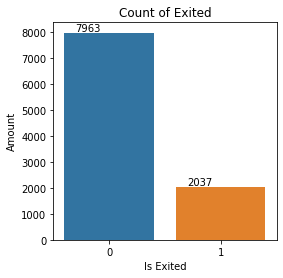

In [9]:
# Creating diagrams
plt.figure(figsize=(4,4))
splot = sns.countplot(x='Exited', data=df, order=df['Exited'].value_counts().index)
plt.xlabel('Is Exited')
plt.ylabel('Amount')
plt.title('Count of Exited')
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Fixing Dataset 

In [10]:
# Fill in the missing values of the tenure column based on age
df['Tenure'] = np.round(df['Tenure'].fillna(df.groupby(['Age'])['Tenure'].transform('mean')))
df['Tenure'].isna().sum()

0

In [11]:
# displaying missing values
df.stb.missing().reset_index()

,index,missing,total,percent
0,RowNumber,0,10000,0.0
1,CustomerId,0,10000,0.0
2,Surname,0,10000,0.0
3,CreditScore,0,10000,0.0
4,Geography,0,10000,0.0
5,Gender,0,10000,0.0
6,Age,0,10000,0.0
7,Tenure,0,10000,0.0
8,Balance,0,10000,0.0
9,NumOfProducts,0,10000,0.0


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Drop Unnecessary Columns

In [12]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Terdapat data yang hilang pada kolom 'Tenure' sebanyak 909 atau 9%, kita mengganti nilai yang hilang tersebut dengan 0

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Data Separation 

Membagi dataset menjadi training 70%, validation 15%, test 15%

In [13]:
df.shape

(10000, 11)

In [14]:
# Separating the dataset into a training set and a second set
train_df, df2 = train_test_split(df, train_size=0.7, random_state=12345)
# Separating the remaining 30% for validation and testing
val_df, test_df = train_test_split(df2, test_size=0.5, random_state=12345)

In [15]:
# Checking each set
print('train_df:')
print(train_df.info())
print()

print('val_df:')
print(val_df.info())
print()

print('test_df:')
print(test_df.info())

train_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9716 to 4578
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   object 
 2   Gender           7000 non-null   object 
 3   Age              7000 non-null   int64  
 4   Tenure           7000 non-null   float64
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
 10  Exited           7000 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 656.2+ KB
None

val_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 9116 to 6895
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0

In [16]:
# Excluding Exited from the set
train_features = train_df.drop('Exited', axis=1) 
train_target = train_df['Exited']

# val_df
val_features = val_df.drop('Exited', axis=1)
val_target = val_df['Exited']

# test_df
test_features = test_df.drop('Exited', axis=1)
test_target = test_df['Exited']

Kita membuat 'Exited' menjadi target dan yang lain menjadi features

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Scaling Standardization

Kinerja model regresi dipengaruhi oleh perbedaan nilai data, terutama ketika fitur diukur dalam satuan yang berbeda. Sederhananya, model regresi mungkin melihat data dengan angka yang lebih besar memiliki signifikansi yang lebih besar dibandingkan data dengan nilai yang lebih kecil. Dengan melakukan scaling standardization dapat meningkatkan efisiensi model regresi dengan mengubah nilai data menjadi skala yang seragam. Untuk mengantisipasi outlier pada data saat ini dan masa depan, kita akan menggunakan standardization, yaitu metode penskalaan yang umum digunakan dan lebih tahan terhadap outlier.

In [17]:
# Creating an instance of StandardScaler
standard_scaler = StandardScaler()

# Fitting & transforming training data
# Defining a logical slice rule for selecting numerical columns
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# .values attribute excludes dataframe headers and prevent errors/warnings
train_features[numeric] = standard_scaler.fit_transform(X=train_features[numeric].values)

# Transforming validation & test sets
val_features[numeric] = standard_scaler.transform(X=val_features[numeric].values)
test_features[numeric] = standard_scaler.transform(X=test_features[numeric].values)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### One Hot Encoding

Agar model ML dapat menentukan korelasi antara fitur target dan kategorikal, fitur tersebut perlu dikodekan dengan angka. kita perlu melakukan One Hot Encoding atau OHE terhadap kolom category agar menjadi fitur numerik 

In [18]:
train_features = pd.get_dummies(train_features, drop_first=True)
val_features = pd.get_dummies(val_features, drop_first=True)
test_features = pd.get_dummies(test_features, drop_first=True)
train_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9716,1.658077,0.012853,-0.011667,0.635477,2.527132,1,1,1.480907,1,0,1
224,0.198643,0.584111,0.352917,0.375870,-0.895510,1,1,0.153167,1,0,1
589,-1.374648,0.774530,0.352917,1.302947,0.815811,0,0,0.817773,0,1,0
7507,-0.784664,0.488901,1.446667,0.696496,-0.895510,1,0,0.329403,1,0,1
1457,2.051400,2.583513,-0.376250,-1.222967,0.815811,0,1,-0.617269,0,0,1


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Model Training & Validation

Kita akan membuat 3 model dengan hyperparameter yang berbeda, kita akan melatih masing-masing dari tiga model klasifikasi dengan hyperparameter yang bervariasi dan mengevaluasi performanya dalam memprediksi set validasi. Performa model akan diukur berdasarkan skor metrik validation (bukan skor training karena skor tersebut hanya akan meningkat seiring dengan semakin banyaknya pelatihan). Meskipun demikian, skor training yang sesuai akan ditampilkan untuk perbandingan.

Pada kasus ini, False Positive dan False Negative sama-sama tidak diinginkan dan akan menimbulkan kerugian besar bagi bank. Kita memerlukan keseimbangan antara kedua metrik ini, jadi kita akan menggunakan metrik yang menggabungkan kedua pengukuran tersebut yakni skor F1. Untuk kemampuan prediksi kelas secara keseluruhan, kita akan menggunakan skor kurva AUC-ROC. Berbeda dengan accuracy, AUC-ROC bekerja dengan baik dengan kumpulan data yang tidak seimbang, seperti yang terjadi pada kasus ini.

Dimana bank menetapkan nilai minimal skor F1 adalah 0.59

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model with imbalance dataset

Kita akan melakukan model training dengan data original yang tidak seimbang untuk melihat kinerjanya

#### Decision Tree

Performa model ini bervariasi berdasarkan kedalaman pohon. Artinya kita harus menjaga pohonnya cukup dalam untuk menghasilkan hasil terbaik, namun tidak terlalu dalam untuk mencegah overfitting dan wasting resources. Untuk mencapai hal ini, kita akan melatih dan memvalidasi model 10 kali dengan kedalaman yang semakin meningkat dan memilih model dengan skor terbaik

In [19]:
df_dummy = df
df_dummy['dummy_pred'] = 1
dummy_pred = len(df_dummy.query('dummy_pred == 1 & Exited == 1')) / len(df_dummy)
dummy_pred_f1_score = (2 * dummy_pred) / (dummy_pred + 1)
dummy_pred_f1_score 

0.3384564260197724

In [20]:
# Defining variables to store scores and models in
tree_best_train_f1 = 0
tree_best_train_roc_auc = 0
tree_best_val_f1 = 0
tree_best_val_roc_auc = 0
tree_best_depth = 0

for depth in range(1, 11):
    # Creating & training models with different depths
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    tree_model.fit(train_features, train_target)
    
    # Getting training class prediction & correct prediction probability scores
    train_pred = tree_model.predict(train_features)
    train_f1 = f1_score(train_target, train_pred)
    train_proba = tree_model.predict_proba(train_features)[:, 1]
    train_roc_auc = roc_auc_score(train_target, train_proba)
    
    # Validation and obtaining validation class prediction & correct prediction probability scores
    val_pred = tree_model.predict(val_features)
    val_f1 = f1_score(val_target, val_pred)
    val_proba = tree_model.predict_proba(val_features)[:, 1]
    val_roc_auc = roc_auc_score(val_target, val_proba)
    
    # Storing the best depth and scores
    if (val_f1 > tree_best_val_f1) and (val_roc_auc > tree_best_val_roc_auc):
        tree_best_train_f1 = train_f1
        tree_best_train_roc_auc = train_roc_auc
        tree_best_val_f1 = val_f1 
        tree_best_val_roc_auc = val_roc_auc
        tree_best_depth = depth
    
print('Best max_depth:', tree_best_depth, '\n', 
      'training F1 score:', tree_best_train_f1, 'training AUC-ROC score:', tree_best_train_roc_auc, '\n',
      'validation F1 score:', tree_best_val_f1, 'validation AUC-ROC score:', tree_best_val_roc_auc)

Best max_depth: 5 
 training F1 score: 0.5776081424936386 training AUC-ROC score: 0.8425748714919036 
 validation F1 score: 0.5611222444889779 validation AUC-ROC score: 0.830072818913805


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

#### Random Forest

Pada model ini accuracy akan bervariasi tergantung pada max_depth dan jumlah pohon (n_estimators).max_depth akan di aur dari 1-10 dan n_estimators akan berkisar dari 10-100 dengan penambahan 10 estimators pada setiap iterasi

In [21]:
# Defining variables to store scores and models in
forest_best_train_f1 = 0
forest_best_train_roc_auc = 0
forest_best_val_f1 = 0
forest_best_val_roc_auc = 0
forest_best_model = None

for depth in range(1, 11):
    for estimator in range(10, 101, 10): # Setting the range of estimators with an increase of 10 estimators per iteration
        
        # Creating & training the model with different max_depth and n_estimators
        forest_model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
        forest_model.fit(train_features, train_target)
        
        # Getting training class prediction & correct prediction probability scores
        train_pred = forest_model.predict(train_features)
        train_f1 = f1_score(train_target, train_pred)
        train_proba = forest_model.predict_proba(train_features)[:, 1]
        train_roc_auc = roc_auc_score(train_target, train_proba)
        
        # Validation and obtaining validation class prediction & correct prediction probability scores
        val_pred = forest_model.predict(val_features)
        val_f1 = f1_score(val_target, val_pred)
        val_proba = forest_model.predict_proba(val_features)[:, 1]
        val_roc_auc = roc_auc_score(val_target, val_proba)
        
        # Storing the best depth and scores
        if (val_f1 > forest_best_val_f1) and (val_roc_auc > forest_best_val_roc_auc):
            forest_best_train_f1 = train_f1
            forest_best_train_roc_auc = train_roc_auc
            forest_best_val_f1 = val_f1 
            forest_best_val_roc_auc = val_roc_auc
            forest_best_model = forest_model
            
print('Best training F1 score:', forest_best_train_f1, 'best training AUC-ROC score:', forest_best_train_roc_auc, '\n',
      'Best validation F1 score:', forest_best_val_f1, 'best validation AUC-ROC score:', forest_best_val_roc_auc)
forest_best_model

Best training F1 score: 0.6528162511542013 best training AUC-ROC score: 0.9394273123563687 
 Best validation F1 score: 0.5811965811965811 best validation AUC-ROC score: 0.8587880988720851


RandomForestClassifier(max_depth=9, n_estimators=60, random_state=12345)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

#### Logistic Regression

Pada model ini kita akan membandingkan five slovers yang disediakan oleh sckit-learn. solver sag dan saga membutuhkan banyak iterasi agar dapat berjalan dengan baik, oleh sebab itu kita akan meningkatkan hyperparameter max_iter menjadi 4000, dan tetap menggunakan nilai default 100 untuk yang lain

In [22]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in solver_list:
    # Creating & training logistic regression models, 
    # changing max_iter as needed
    if solver == 'sag' or solver == 'saga':
        logreg_model = LogisticRegression(random_state=12345, 
                                          solver=solver, max_iter=4000)
    else:
        logreg_model = LogisticRegression(random_state=12345, solver=solver)
    logreg_model.fit(train_features, train_target)
    
    # Getting training accuracy scores
    train_pred = logreg_model.predict(train_features)
    train_f1 = f1_score(train_target, train_pred)
    train_proba = forest_model.predict_proba(train_features)[:, 1]
    train_roc_auc = roc_auc_score(train_target, train_proba)
    print(solver)
    print('training F1 score:', train_f1)
    print('training AUC-ROC score:', train_roc_auc)

    # Validating model & getting accuracy
    val_pred = logreg_model.predict(val_features)
    val_f1 = f1_score(val_target, val_pred)
    val_proba = forest_model.predict_proba(val_features)[:, 1]
    val_roc_auc = roc_auc_score(val_target, val_proba)
    print('validation F1 score:', val_f1)
    print('validation AUC-ROC score:', val_roc_auc)
    print()

liblinear
training F1 score: 0.33126293995859213
training AUC-ROC score: 0.9608933666528069
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8570761581538343

newton-cg
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9608933666528069
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8570761581538343

lbfgs
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9608933666528069
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8570761581538343

sag
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9608933666528069
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8570761581538343

saga
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9608933666528069
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8570761581538343



Kesimpulan melatih model dengan menggunakan imbalanced data :

- Decision tree (max_depth = 5):
F1: ~0.561,
AUC-ROC: ~0.83
- Random forest (max_depth=9, n_estimators=60):
F1: ~0.586,
AUC-ROC: ~0.858
- Logistic regression (any solver):
F1: ~0.319,
AUC-ROC: ~0.857

Tidak ada model yang melewati nilai minimal F1 : 0.59

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Fixing imbalance dataset

Menyeimbangkan data dapat mengurangi bias yang ditimbulkan oleh class proportions yang tidak seimbang, yang mana akan meningkatkan performa model, Kita akan mencoba beberapa pendekatan untuk dapat menyeimbangkan data.

In [23]:
print(train_target.value_counts(normalize=False))
print(train_target.value_counts(normalize=True))

0    5589
1    1411
Name: Exited, dtype: int64
0    0.798429
1    0.201571
Name: Exited, dtype: float64


#### Class Weight 

kita akan menggunakan pendekatan menambahkan hyperparameter class_weight = 'balance'

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

##### Decision Tree 

In [24]:
# Defining variables to store scores and models in
tree_best_train_f1 = 0
tree_best_train_roc_auc = 0
tree_best_val_f1 = 0
tree_best_val_roc_auc = 0
tree_best_depth = 0

for depth in range(1, 11):
    # Creating & training models with different depths
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    tree_model.fit(train_features, train_target)
    
    # Getting training class prediction & correct prediction probability scores
    train_pred = tree_model.predict(train_features)
    train_f1 = f1_score(train_target, train_pred)
    train_proba = tree_model.predict_proba(train_features)[:, 1]
    train_roc_auc = roc_auc_score(train_target, train_proba)
    
    # Validation and obtaining validation class prediction & correct prediction probability scores
    val_pred = tree_model.predict(val_features)
    val_f1 = f1_score(val_target, val_pred)
    val_proba = tree_model.predict_proba(val_features)[:, 1]
    val_roc_auc = roc_auc_score(val_target, val_proba)
    
    # Storing the best depth and scores
    if (val_f1 > tree_best_val_f1) and (val_roc_auc > tree_best_val_roc_auc):
        tree_best_train_f1 = train_f1
        tree_best_train_roc_auc = train_roc_auc
        tree_best_val_f1 = val_f1 
        tree_best_val_roc_auc = val_roc_auc
        tree_best_depth = depth
    
print('Best max_depth:', tree_best_depth, '\n', 
      'training F1 score:', tree_best_train_f1, 'training AUC-ROC score:', tree_best_train_roc_auc, '\n',
      'validation F1 score:', tree_best_val_f1, 'validation AUC-ROC score:', tree_best_val_roc_auc)

Best max_depth: 5 
 training F1 score: 0.5850257653834495 training AUC-ROC score: 0.8467621868865377 
 validation F1 score: 0.5958041958041959 validation AUC-ROC score: 0.8382543665409788


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

##### Random Forest

In [25]:
# Defining variables to store scores and models in
forest_best_train_f1 = 0
forest_best_train_roc_auc = 0
forest_best_val_f1 = 0
forest_best_val_roc_auc = 0
forest_best_model = None

for depth in range(1, 11):
    for estimator in range(10, 101, 10): # Setting the range of estimators with an increase of 10 estimators per iteration
        
        # Creating & training the model with different max_depth and n_estimators
        forest_model = RandomForestClassifier(random_state=12345, max_depth=depth, 
                                              n_estimators=estimator, class_weight='balanced')
        forest_model.fit(train_features, train_target)
        
        # Getting training class prediction & correct prediction probability scores
        train_pred = forest_model.predict(train_features)
        train_f1 = f1_score(train_target, train_pred)
        train_proba = forest_model.predict_proba(train_features)[:, 1]
        train_roc_auc = roc_auc_score(train_target, train_proba)
        
        # Validation and obtaining validation class prediction & correct prediction probability scores
        val_pred = forest_model.predict(val_features)
        val_f1 = f1_score(val_target, val_pred)
        val_proba = forest_model.predict_proba(val_features)[:, 1]
        val_roc_auc = roc_auc_score(val_target, val_proba)
        
        # Storing the best depth and scores
        if (val_f1 > forest_best_val_f1) and (val_roc_auc > forest_best_val_roc_auc):
            forest_best_train_f1 = train_f1
            forest_best_train_roc_auc = train_roc_auc
            forest_best_val_f1 = val_f1 
            forest_best_val_roc_auc = val_roc_auc
            forest_best_model = forest_model
            
print('Best training F1 score:', forest_best_train_f1, 'best training AUC-ROC score:', forest_best_train_roc_auc, '\n',
      'Best validation F1 score:', forest_best_val_f1, 'best validation AUC-ROC score:', forest_best_val_roc_auc)
forest_best_model

Best training F1 score: 0.7008601465434852 best training AUC-ROC score: 0.9221693061913278 
 Best validation F1 score: 0.6499999999999999 best validation AUC-ROC score: 0.8585642086984061


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                       random_state=12345)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

##### Logistic Regression

In [26]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in solver_list:
    # Creating & training logistic regression models, 
    # changing max_iter as needed
    if solver == 'sag' or solver == 'saga':
        logreg_model = LogisticRegression(random_state=12345, 
                                          solver=solver, max_iter=4000)
    else:
        logreg_model = LogisticRegression(random_state=12345, solver=solver)
    logreg_model.fit(train_features, train_target)
    
    # Getting training accuracy scores
    train_pred = logreg_model.predict(train_features)
    train_f1 = f1_score(train_target, train_pred)
    train_proba = forest_model.predict_proba(train_features)[:, 1]
    train_roc_auc = roc_auc_score(train_target, train_proba)
    print(solver)
    print('training F1 score:', train_f1)
    print('training AUC-ROC score:', train_roc_auc)

    # Validating model & getting accuracy
    val_pred = logreg_model.predict(val_features)
    val_f1 = f1_score(val_target, val_pred)
    val_proba = forest_model.predict_proba(val_features)[:, 1]
    val_roc_auc = roc_auc_score(val_target, val_proba)
    print('validation F1 score:', val_f1)
    print('validation AUC-ROC score:', val_roc_auc)
    print()

liblinear
training F1 score: 0.33126293995859213
training AUC-ROC score: 0.9674340061772142
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8604563537027887

newton-cg
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9674340061772142
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8604563537027887

lbfgs
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9674340061772142
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8604563537027887

sag
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9674340061772142
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8604563537027887

saga
training F1 score: 0.33039875712066286
training AUC-ROC score: 0.9674340061772142
validation F1 score: 0.31999999999999995
validation AUC-ROC score: 0.8604563537027887



Kesimpulan melatih model dengan menggunakan pendekatan class weight :

- Decision tree (max_depth = 5):
F1: ~0.595,
AUC-ROC: ~0.838
- Random forest (max_depth=8, n_estimators=60):
F1: ~0.649,
AUC-ROC: ~0.858
- Logistic regression (any solver):
F1: ~0.319,
AUC-ROC: ~0.86

Hanya model logistic regression yang tidak melewati nilai minimal F1 : 0.59, dengan model random forest memiliki skor F1 tertinggi

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

#### Upsampling

Dengan menggunakan pendekatan upsampling, kita nilai 'excited=1' agar nilainya mendekati 'excited=0' yang mana jumlahnya sangat banyak, Kemudian kita harus mengacak data untuk mencegah bias pembelajaran.

Scikit-learn tidak memiliki fungsi bawaan untuk metode ini, jadi kita harus mendefinisikan sendiri fungsinya.

In [27]:
def upsample(features, target, upsample_one, repeat, random_state):

    # Separating features and targets of each class
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Choosing which class observations to upsample
    if upsample_one == True:
        features_upsampled = pd.concat([features_zeros] + 
                                       [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + 
                                     [target_ones] * repeat)
    else:
        features_upsampled = pd.concat([features_ones] + 
                                       [features_zeros] * repeat)
        target_upsampled = pd.concat([target_ones] + 
                                     [target_zeros] * repeat)
    
    # Shuffling data
    features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                   target_upsampled, 
                                                   random_state=random_state)
    
    return features_upsampled, target_upsampled


# Upsampling the training set 4 times
features_upsampled, target_upsampled = upsample(train_features,
                                                train_target,
                                                upsample_one=True,
                                                repeat=3,
                                                random_state=12345)

print(f'Class 1 observances in original training set: {len(train_features[train_target == 1])}',
      f'Class 1 observances in upsampled training set: {len(features_upsampled[target_upsampled == 1])}',
      sep='\n')

Class 1 observances in original training set: 1411
Class 1 observances in upsampled training set: 4233


In [28]:
print('Training set class count:', train_target.value_counts(), sep='\n')
print('Upsampled set class count:', target_upsampled.value_counts(), sep='\n')

Training set class count:
0    5589
1    1411
Name: Exited, dtype: int64
Upsampled set class count:
0    5589
1    4233
Name: Exited, dtype: int64


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

##### Decision Tree 

In [29]:
# Defining variables to store scores and models in
tree_best_train_f1 = 0
tree_best_train_roc_auc = 0
tree_best_val_f1 = 0
tree_best_val_roc_auc = 0
upsampled_tree_best_depth = 0

for depth in range(1, 11):
    # Creating & training models with different depths
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    tree_model.fit(features_upsampled, target_upsampled)
    
    # Getting training class prediction & correct prediction probability scores
    train_pred = tree_model.predict(features_upsampled)
    train_f1 = f1_score(target_upsampled, train_pred)
    train_proba = tree_model.predict_proba(features_upsampled)[:, 1]
    train_roc_auc = roc_auc_score(target_upsampled, train_proba)
    
    # Validation and obtaining validation class prediction & correct prediction probability scores
    val_pred = tree_model.predict(val_features)
    val_f1 = f1_score(val_target, val_pred)
    val_proba = tree_model.predict_proba(val_features)[:, 1]
    val_roc_auc = roc_auc_score(val_target, val_proba)
    
    # Storing the best depth and scores
    if (val_f1 > tree_best_val_f1) and (val_roc_auc > tree_best_val_roc_auc):
        tree_best_train_f1 = train_f1
        tree_best_train_roc_auc = train_roc_auc
        tree_best_val_f1 = val_f1 
        tree_best_val_roc_auc = val_roc_auc
        tree_best_depth = depth
    
print('Best max_depth:', tree_best_depth, '\n', 
      'training F1 score:', tree_best_train_f1, 'training AUC-ROC score:', tree_best_train_roc_auc, '\n',
      'validation F1 score:', tree_best_val_f1, 'validation AUC-ROC score:', tree_best_val_roc_auc)

Best max_depth: 5 
 training F1 score: 0.7102924127270386 training AUC-ROC score: 0.8467621868865377 
 validation F1 score: 0.6051437216338881 validation AUC-ROC score: 0.8382598272769222


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

##### Random Forest

In [30]:
# Defining variables to store scores and models in
forest_best_train_f1 = 0
forest_best_train_roc_auc = 0
forest_best_val_f1 = 0
forest_best_val_roc_auc = 0
forest_best_model = None

for depth in range(1, 11):
    for estimator in range(10, 101, 10): # Setting the range of estimators with an increase of 10 estimators per iteration
        
        # Creating & training the model with different max_depth and n_estimators
        forest_model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
        forest_model.fit(features_upsampled, target_upsampled)
        
        # Getting training class prediction & correct prediction probability scores
        train_pred = forest_model.predict(features_upsampled)
        train_f1 = f1_score(target_upsampled, train_pred)
        train_proba = forest_model.predict_proba(features_upsampled)[:, 1]
        train_roc_auc = roc_auc_score(target_upsampled, train_proba)
        
        # Validation and obtaining validation class prediction & correct prediction probability scores
        val_pred = forest_model.predict(val_features)
        val_f1 = f1_score(val_target, val_pred)
        val_proba = forest_model.predict_proba(val_features)[:, 1]
        val_roc_auc = roc_auc_score(val_target, val_proba)
        
        # Storing the best depth and scores
        if (val_f1 > forest_best_val_f1) and (val_roc_auc > forest_best_val_roc_auc):
            forest_best_train_f1 = train_f1
            forest_best_train_roc_auc = train_roc_auc
            forest_best_val_f1 = val_f1 
            forest_best_val_roc_auc = val_roc_auc
            forest_best_model = forest_model
            
print('Best training F1 score:', forest_best_train_f1, 'best training AUC-ROC score:', forest_best_train_roc_auc, '\n',
      'Best validation F1 score:', forest_best_val_f1, 'best validation AUC-ROC score:', forest_best_val_roc_auc)
forest_best_model

Best training F1 score: 0.8353383458646617 best training AUC-ROC score: 0.945546576441854 
 Best validation F1 score: 0.6454689984101749 best validation AUC-ROC score: 0.8613874091811353


RandomForestClassifier(max_depth=9, n_estimators=90, random_state=12345)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

##### Logistic Regression

In [31]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in solver_list:
    # Creating & training logistic regression models, 
    # changing max_iter as needed
    if solver == 'sag' or solver == 'saga':
        logreg_model = LogisticRegression(random_state=12345, solver=solver, max_iter=4000)
    else:
        logreg_model = LogisticRegression(random_state=12345, solver=solver)
    logreg_model.fit(features_upsampled, target_upsampled)
    
    # Getting training accuracy scores
    train_pred = logreg_model.predict(features_upsampled)
    train_f1 = f1_score(target_upsampled, train_pred)
    train_proba = forest_model.predict_proba(features_upsampled)[:, 1]
    train_roc_auc = roc_auc_score(target_upsampled, train_proba)
    print(solver)
    print('training F1 score:', train_f1)
    print('training AUC-ROC score:', train_roc_auc)

    # Validating model & getting accuracy
    val_pred = logreg_model.predict(val_features)
    val_f1 = f1_score(val_target, val_pred)
    val_proba = forest_model.predict_proba(val_features)[:, 1]
    val_roc_auc = roc_auc_score(val_target, val_proba)
    print('validation F1 score:', val_f1)
    print('validation AUC-ROC score:', val_roc_auc)
    print()

liblinear
training F1 score: 0.636769015161167
training AUC-ROC score: 0.9676124218385334
validation F1 score: 0.5118110236220472
validation AUC-ROC score: 0.8589000439589244

newton-cg
training F1 score: 0.636769015161167
training AUC-ROC score: 0.9676124218385334
validation F1 score: 0.5118110236220472
validation AUC-ROC score: 0.8589000439589244

lbfgs
training F1 score: 0.636769015161167
training AUC-ROC score: 0.9676124218385334
validation F1 score: 0.5118110236220472
validation AUC-ROC score: 0.8589000439589244

sag
training F1 score: 0.636769015161167
training AUC-ROC score: 0.9676124218385334
validation F1 score: 0.5118110236220472
validation AUC-ROC score: 0.8589000439589244

saga
training F1 score: 0.636769015161167
training AUC-ROC score: 0.9676124218385334
validation F1 score: 0.5118110236220472
validation AUC-ROC score: 0.8589000439589244



Kesimpulan melatih model dengan menggunakan pendekatan upsampling :

- Decision tree (max_depth = 5):
F1: ~0.605,
AUC-ROC: ~0.838
- Random forest (max_depth=9, n_estimators=90):
F1: ~0.645,
AUC-ROC: ~0.861
- Logistic regression (any solver):
F1: ~0.511,
AUC-ROC: ~0.858

Hanya model logistic regression yang tetap tidak dapat tidak melewati nilai minimal F1 : 0.59, dengan tetap model random forest memiliki skor F1 tertinggi

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model Conclusion

Dengan menggunakan 3 pendekatan berbeda untuk melatih model kita dapat menarik kesimpulan :

- Model terbaik dengan menggunakan imbalance dataset
Random forest (max_depth=9, n_estimators=60):
F1: ~0.586,
AUC-ROC: ~0.858
- Model terbaik dengan pendekatan class weight
Random forest (max_depth=8, n_estimators=60):
F1: ~0.649,
AUC-ROC: ~0.858
- Model terbaik dengan pendekatan upsampling
Random forest (max_depth=9, n_estimators=90):
F1: ~0.645,
AUC-ROC: ~0.861

Kedua model random forest terakhir melebihi batas minimum nilai skor F1 0.59, Pendekatan class weight memiliki nilai F1 lebih tinggi, tetapi nilai AUC-ROC lebih rendah dari pendekatan upsampling.

Kita memutuskan untuk menggunakan model random forest dengan pendekatan class weight karena kita menilai lebih baik dari model yang lain karena skor F1 yang paling tinggi

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Testing

In [32]:
# Combining training and validation sets
final_features = pd.concat([train_features] + [val_features])
final_target = pd.concat([train_target] + [val_target])

# Creating and training model
final_model = RandomForestClassifier(max_depth=9, n_estimators=20, class_weight='balanced', random_state=12345)
final_model.fit(final_features, final_target)

# Testing
test_pred = final_model.predict(test_features)
test_f1 = f1_score(test_target, test_pred)

test_proba = final_model.predict_proba(test_features)[:, 1]
test_roc_auc = roc_auc_score(test_target, test_proba)

print('Test F1 score:', test_f1)
print('Test AUC-ROC score:', test_roc_auc)

Test F1 score: 0.6323529411764706
Test AUC-ROC score: 0.8577821781126987


Meskipun ada sedikit penurunan skor, model ini berhasil dalam testing, melampaui skor dasar dengan F1 sebesar 0,632 dan skor AUC-ROC sebesar 0,857.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## General Conclusion

Beberapa langkah yang telah kita lakukan untuk memproses data pada tugas ini :

- Mengganti nilai yang hilang pada Tenure dengan 0
- Mendrop features yang tidak relevan
- Membagi full dataset menjadi training, validation, dan test
- Pemisahan lebih lanjut menjadi set features dan target
- Melakukan penskalaan pada numeric values dengan standardization
- Melakukan One hot encoding
- Melakukan training model pada data yang imbalance dengan berbagai pendekatan sehingga bisa menghasilkan model terbaik yakni pendekatan class weight

Model akhir yang akain kita gunakan untuk menyelesaikan tugas untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak adalah random forest classifier dengan hyperparameter :

max_depth = 8
n_estimators = 60
class_weight = 'balanced'
random_state = 12345

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>